In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
# To visualize the training process
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("aug_train.csv")
data = data.dropna()
data


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [3]:
data.loc[data['experience'] == '<1', 'experience'] = 0
data.loc[data['experience'] == '>20', 'experience'] = 21
data.loc[data['last_new_job'] == 'never', 'last_new_job'] = 0
data.loc[data['last_new_job'] == '>4', 'last_new_job'] = 5

In [4]:
data['experience'] = pd.to_numeric(data['experience'])
data['last_new_job'] = pd.to_numeric(data['last_new_job'])

In [5]:
def normalizer(data, cols):
    mean = data[cols].mean()
    data[cols] -= mean
    var = data[cols].var()
    data[cols] /= var
    return data, mean, var


In [6]:
columns = np.array(['training_hours', 'experience', 'last_new_job'])
stats = np.empty((3, 2))
for i in range(0, 3):
    data, stats[i, 0], stats[i, 1] = normalizer(data, columns[i])

In [7]:
# Numericals are added.
final = (data[['city_development_index', 'training_hours', 'experience', 'last_new_job']]).values


In [8]:
categoricals = np.array(['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'])


In [9]:
for i in categoricals:
    values = np.array(data[i])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    # Makes a column
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    final = np.hstack((final, onehot_encoder.fit_transform(integer_encoded)))

In [10]:
target = data.iloc[:,13:14].values
target = onehot_encoder.fit_transform(target)
values = final[:,:151]


In [11]:
final_train, final_test, target_train, target_test = train_test_split(values, target,test_size = 0.2)

In [15]:
model = Sequential()
model.add(Dense(16, input_dim=151, activation= 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(final_train, target_train, validation_data = (final_test, target_test), epochs=100, batch_size=64)

Epoch 1/100
112/112 [==============================] - 1s 4ms/step - loss: 0.2709 - accuracy: 0.8864 - val_loss: 0.5306 - val_accuracy: 0.8264
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2688 - accuracy: 0.8889 - val_loss: 0.5353 - val_accuracy: 0.8275
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.8887 - val_loss: 0.5365 - val_accuracy: 0.8269
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.8871 - val_loss: 0.5385 - val_accuracy: 0.8275
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.8892 - val_loss: 0.5483 - val_accuracy: 0.8331
Epoch 6/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2673 - accuracy: 0.8878 - val_loss: 0.5456 - val_accuracy: 0.8308
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.8882 - val_loss: 0.5457 - val_accuracy: 0.8286

Epoch 58/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2511 - accuracy: 0.8956 - val_loss: 0.6224 - val_accuracy: 0.8275
Epoch 59/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2521 - accuracy: 0.8968 - val_loss: 0.6111 - val_accuracy: 0.8163
Epoch 60/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2511 - accuracy: 0.8963 - val_loss: 0.6234 - val_accuracy: 0.8163
Epoch 61/100
112/112 [==============================] - 1s 6ms/step - loss: 0.2518 - accuracy: 0.8942 - val_loss: 0.6223 - val_accuracy: 0.8185
Epoch 62/100
112/112 [==============================] - 1s 6ms/step - loss: 0.2537 - accuracy: 0.8934 - val_loss: 0.6181 - val_accuracy: 0.8107
Epoch 63/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2529 - accuracy: 0.8964 - val_loss: 0.6172 - val_accuracy: 0.8202
Epoch 64/100
112/112 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.8959 - val_loss: 0.6261 - val_accuracy:

In [29]:
y_pred = model.predict(final_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(target_test)):
    test.append(np.argmax(target_test[i]))

In [30]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)


Accuracy is: 82.74706867671692


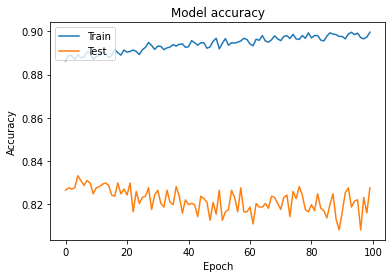

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

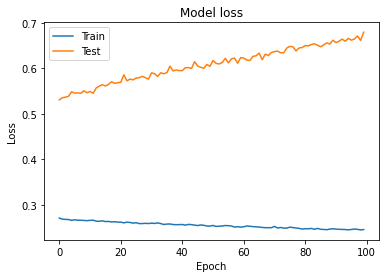

In [32]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()